In [1]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 465 kB 67.1 MB/s 


In [2]:
import pickle
from google.colab import drive

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

from tqdm.notebook import tqdm
from collections import Counter
import statistics as stats
import re

from konlpy.tag import Okt
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression


In [3]:
import numpy as np
from sklearn.datasets import make_multilabel_classification
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn.multioutput import MultiOutputClassifier

In [5]:
songs = pd.read_excel('/content/song_lyrics_labeled.xlsx')
songs.dropna(inplace=True)
songs

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,year,singer,names,categories,lyrics,hope,money,...,friend,equal,swear,nature,regret,memory,sf,food,confi,enjoy
0,0,0,0,1964,금호동,내일또만납시다,희망,하루의 일을 끝내고 돌아가는거리엔 사람의 물결하늘엔 별이 하나 둘 반짝이면가로등 하...,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1964,최숙자,눈물의연평도,"후회, 자연",조기를 담뿍잡아기폭을 올리고온다던 그배는어이하여 아니오나수평선 바라보며그이름 부르면...,0,0,...,0,0,0,1,1,0,0,0,0,0
2,2,2,2,1964,이미자,님이라부르리까,사랑,<1절 임이라 부르리까 당신이라고 부르리까 사랑을 하면서도 사랑을 참고사는 마음으로...,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,3,1964,이미자,동백아가씨,"사랑, 후회",헤일 수 없이 수많은 밤을내 가슴 도려내는 아픔에 겨워얼마나 울었던가 동백아가씨그리...,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4,4,4,1964,현미,떠날때는말없이,"사랑, 후회",그 날 밤 그 자리에둘이서 만났을 때똑같은 그 순간에똑같은 마음이달빛에 젖은 채밤새...,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6195,6195,6195,7432,2021,IVE(아이브),ELEVEN,사랑,따분한 나의 눈빛이 무표정했던 얼굴이 널 보며 빛나고 있어 널 담은 눈동자는 내 ...,0,0,...,0,0,0,0,0,0,0,0,0,0
6196,6196,6196,7433,2021,다비치,매일크리스마스(EverydayChristmas),사랑,모두가 기다려온 이 겨울 두 손엔 가득 선물을 행복한 사람들 빛...,0,0,...,0,0,0,0,0,0,0,0,0,0
6197,6197,6197,7434,2021,아이유(IU),겨울잠,희망,때 이른 봄 몇 송이 꺾어다 너의 방 문 앞에 두었어 긴 잠 실컷 자고 나오면 그때...,1,0,...,0,0,0,0,0,0,0,0,0,0
6198,6198,6198,7435,2021,폴킴(PaulKim),찬란한계절,사랑,비가 내리는 반대편으로 여름을 향해 달리네 내게로 내미는 어떤 것도 끝내 붙잡지 못...,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
def combine_df(df):
  full = []
  for i in tqdm(range(df.shape[0])):
    sem = []
    for j in range(8,22):
      sem.append(songs.iloc[i][j])
    full.append(sem)
  return full

In [7]:
full = combine_df(songs)
songs['full'] = full

  0%|          | 0/6200 [00:00<?, ?it/s]

In [8]:
X = songs.lyrics
y = songs.full

In [9]:
y = np.array(y.tolist())

In [10]:
stop_list = ['잠', '바', '워', '몸', '진짜', '언젠가', '죽다', '힘', '뭐라다', '절대', '그저', '애', '하얗다', '돌다', '누가', '크다', '늘', '다시다', '뜨겁다', '아침', '가지', '숨', '상처', '뛰다', '순', '듣다', '머리', '단지', '이상', '꼭', '어리다', '기다', '따르다', '채', '향', '떨어지다', '듯', '예', '뜨다', '아직도', '갖다', '전', '나오다']
stop_list2 = ['받다', '때문', '지다', '서다', '이름', '많이', '수가', '조금', '아래', '두', '좀', '의', '무엇', '한번']
stop_list3 = ['줄', '처럼', '누구', '뿐', '만들다', '게', '순간', '어디', '미치다', '다른', '길', '뭐', '음', '안녕', '저', '건', '하루', '그래서', '여기', '이렇다', '손', '그렇게','우', '자다', '많다', '노래', '뒤', '응', '곳', '말다', '거', '정말', '대다', '이다', '웃다', '못', '하늘', '에스', '어떻다', '없이', '해주다', '곁', '나다', '티', '모든', '이렇게', '들다']
stop_list4 = ['하다', '있다', '없다', '말', '되다', '그렇다', '생각', '걸', '그', '것', '오', '이', '다', '속','해',
 '돼다', '알', '젠', '나르다', '주다', '아기', '중', '사람', '오다','가다','않다']

In [11]:
stop_list.extend(stop_list2)
stop_list.extend(stop_list3)
stop_list.extend(stop_list4)

In [12]:
def preprocessing(review): 
    okt = Okt()
    
    # f = open('nsmc_stopwords.txt')
    # stop_words = f.read().split()
    
    # 1. 한글 및 공백을 제외한 문자 모두 제거.
    review_text = re.sub("[^가-힣\\s]", "", review)
    
    # 2. okt 객체를 활용해서 형태소 토큰화 + 품사 태깅
    word_review = okt.pos(review_text, stem=True)
    
    # 노이즈 & 불용어 제거
    word_review = [(token, pos) for token, pos in word_review if not token in stop_list]
    
    # 명사, 동사, 형용사 추출
    word_review = [token for token, pos in word_review if pos in ['Noun', 'Verb', 'Adjective', 'Adverb']]

    return word_review

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .8
)

In [14]:
tfidf = TfidfVectorizer(tokenizer=preprocessing, max_features=3000, min_df=5, max_df=0.5) 

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

X_train_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
# clf = MultiOutputClassifier(estimator= LogisticRegression()).fit(X_test_tfidf, y_test)
# clf.predict(X_test_tfidf)

In [16]:
# clf.score(X_test_tfidf, y_test)

### 1. Random Froest 

In [17]:
RFC = MultiOutputClassifier(estimator= RandomForestClassifier()).fit(X_test_tfidf, y_test)
RFC.predict(X_test_tfidf)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [18]:
RFC_score = RFC.score(X_test_tfidf, y_test)

### 2. KNN (K-Nearest Neighbors)

In [19]:
KNN = MultiOutputClassifier(estimator= KNeighborsClassifier()).fit(X_test_tfidf, y_test)
KNN.predict(X_test_tfidf)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [20]:
KNN_score = KNN.score(X_test_tfidf, y_test)
KNN_score

0.5395161290322581

### 3. Ada boost

In [21]:
ADA = MultiOutputClassifier(estimator= AdaBoostClassifier()).fit(X_test_tfidf, y_test)
ADA.predict(X_test_tfidf)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [22]:
ADA_score = ADA.score(X_test_tfidf, y_test)

### 4. Gradient Boost

In [23]:
GRD = MultiOutputClassifier(estimator= GradientBoostingClassifier()).fit(X_test_tfidf, y_test)
GRD.predict(X_test_tfidf)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [24]:
GRD_score = GRD.score(X_test_tfidf, y_test)

### 5. Extra Trees

In [25]:
EXT = MultiOutputClassifier(estimator= ExtraTreesClassifier()).fit(X_test_tfidf, y_test)
EXT.predict(X_test_tfidf)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [26]:
EXT_score = EXT.score(X_test_tfidf, y_test)

### 6. Decision Tree

In [27]:
DTC = MultiOutputClassifier(estimator= DecisionTreeClassifier()).fit(X_test_tfidf, y_test)
DTC.predict(X_test_tfidf)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [28]:
DTC_score = DTC.score(X_test_tfidf, y_test)

### 7. Support Vector

In [29]:
SVM = MultiOutputClassifier(estimator= SVC()).fit(X_test_tfidf, y_test)
SVM.predict(X_test_tfidf)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [30]:
SVM_score = SVM.score(X_test_tfidf, y_test)

### 8. MLP(Multi-layer Perceptron)

In [31]:
MLP = MultiOutputClassifier(estimator= MLPClassifier()).fit(X_test_tfidf, y_test)
MLP.predict(X_test_tfidf)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [32]:
MLP_score = MLP.score(X_test_tfidf, y_test)

### 9. Logistic Regression

In [33]:
LGS = MultiOutputClassifier(estimator= LogisticRegression()).fit(X_test_tfidf, y_test)
LGS.predict(X_test_tfidf)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [34]:
LGS_score = LGS.score(X_test_tfidf, y_test)

In [35]:
multi_dict = {'RFC_score':RFC_score,
              'KNN_score':KNN_score,
              'ADA_score':ADA_score,
              'GRD_score':GRD_score,
              'EXT_score':EXT_score,
              'DTC_score':DTC_score,
              'SVM_score':SVM_score,
              'MLP_score':MLP_score,
              'LGS_score':LGS_score}

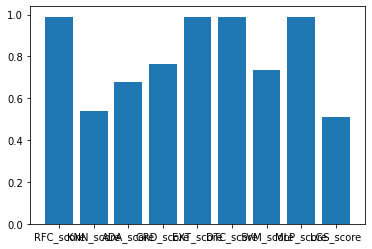

In [36]:
import matplotlib.pyplot as plt

plt.bar(*zip(*multi_dict.items()))
plt.show()

별로인 모델은 누락 후, 괜찮은 모델들끼리 앙상블.

In [40]:
print(RFC_score, KNN_score, ADA_score, GRD_score, EXT_score, DTC_score, SVM_score, MLP_score, LGS_score)

0.9887096774193549 0.5395161290322581 0.6798387096774193 0.7653225806451613 0.9887096774193549 0.9887096774193549 0.7354838709677419 0.989516129032258 0.510483870967742
